In [2]:
# Step 1: Set Up the Environment
# I'll write the necessary installation commands and import statements.
# Note: Run these installation commands in your Python environment.

!pip install h2o
!pip install pandas
!pip install matplotlib

# Importing the necessary libraries
import h2o
import pandas as pd
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:

# Initialize the H2O server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321.. connected.


H2O_cluster_uptime:,1 min 55 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 22 days
H2O_cluster_name:,H2O_from_python_hacksakstyle_yhnxdc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.908 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
# Load the day-level dataset
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Display the first few rows of the dataset to understand its structure
day_df.head()
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
# Preprocessing the day dataset
day_df_preprocessed = day_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Preprocessing the hour dataset
hour_df_preprocessed = hour_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Display the first few rows of the preprocessed day dataset to confirm
day_df_preprocessed.head()
hour_df_preprocessed.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [7]:

h2o.init(max_mem_size="4G")  # Adjust memory size according to your system capabilities

# Convert the Pandas DataFrames to H2O Frames
day_h2o = h2o.H2OFrame(day_df_preprocessed)

# Splitting the data into 70% training and 30% testing
train, test = day_h2o.split_frame(ratios=[.7], seed=123)

# Displaying the split to ensure it's done correctly
train.shape, test.shape



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 mins 35 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 22 days
H2O_cluster_name:,H2O_from_python_hacksakstyle_yhnxdc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.908 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


((501, 12), (230, 12))

In [16]:
train_day, test_day = h2o.H2OFrame(day_df), h2o.H2OFrame(day_df)
train_hourly, test_hourly = h2o.H2OFrame(hour_df), h2o.H2OFrame(hour_df)

# Train the models
aml_day = H2OAutoML(max_models=10, seed=1)
aml_day.train(y="cnt", training_frame=train_day)

aml_hourly = H2OAutoML(max_models=10, seed=1)
aml_hourly.train(y="cnt", training_frame=train_hourly)


Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██ (cancelled)

19:34:40.272: Empty leaderboard.
AutoML was not able to build any model within a max runtime constraint of 0 seconds, you may want to increase this value before retrying.



H2OJobCancelled: Job<$03017f00000132d4ffffffff$_a8df5358226bc9a080dce87cf044498c> was cancelled by the user.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_2_AutoML_3_20240211_192918,26.6201,708.629,18.6883,0.0530613,708.629,4095,0.074384,XGBoost
StackedEnsemble_AllModels_1_AutoML_3_20240211_192918,33.7892,1141.71,22.7657,0.104594,1141.71,5189,0.628828,StackedEnsemble
XGBoost_3_AutoML_3_20240211_192918,35.8058,1282.06,27.7647,0.0385012,1282.06,2576,0.010556,XGBoost
GBM_4_AutoML_3_20240211_192918,37.1433,1379.62,22.0154,0.117729,1379.62,2449,0.224876,GBM
StackedEnsemble_BestOfFamily_1_AutoML_3_20240211_192918,37.9993,1443.95,25.8774,0.106382,1443.95,5465,0.224117,StackedEnsemble
XGBoost_1_AutoML_3_20240211_192918,39.5862,1567.07,26.2579,0.0876541,1567.07,4268,0.012227,XGBoost
GBM_2_AutoML_3_20240211_192918,39.7835,1582.72,25.7313,0.114329,1582.72,1701,0.049397,GBM
GBM_3_AutoML_3_20240211_192918,53.0724,2816.68,35.2595,0.127509,2816.68,2762,0.24544,GBM
DRF_1_AutoML_3_20240211_192918,89.4654,8004.06,57.4243,0.120687,8004.06,3048,0.303581,DRF
XRT_1_AutoML_3_20240211_192918,106.939,11435.8,67.0579,0.155913,11435.8,3499,0.092668,DRF


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

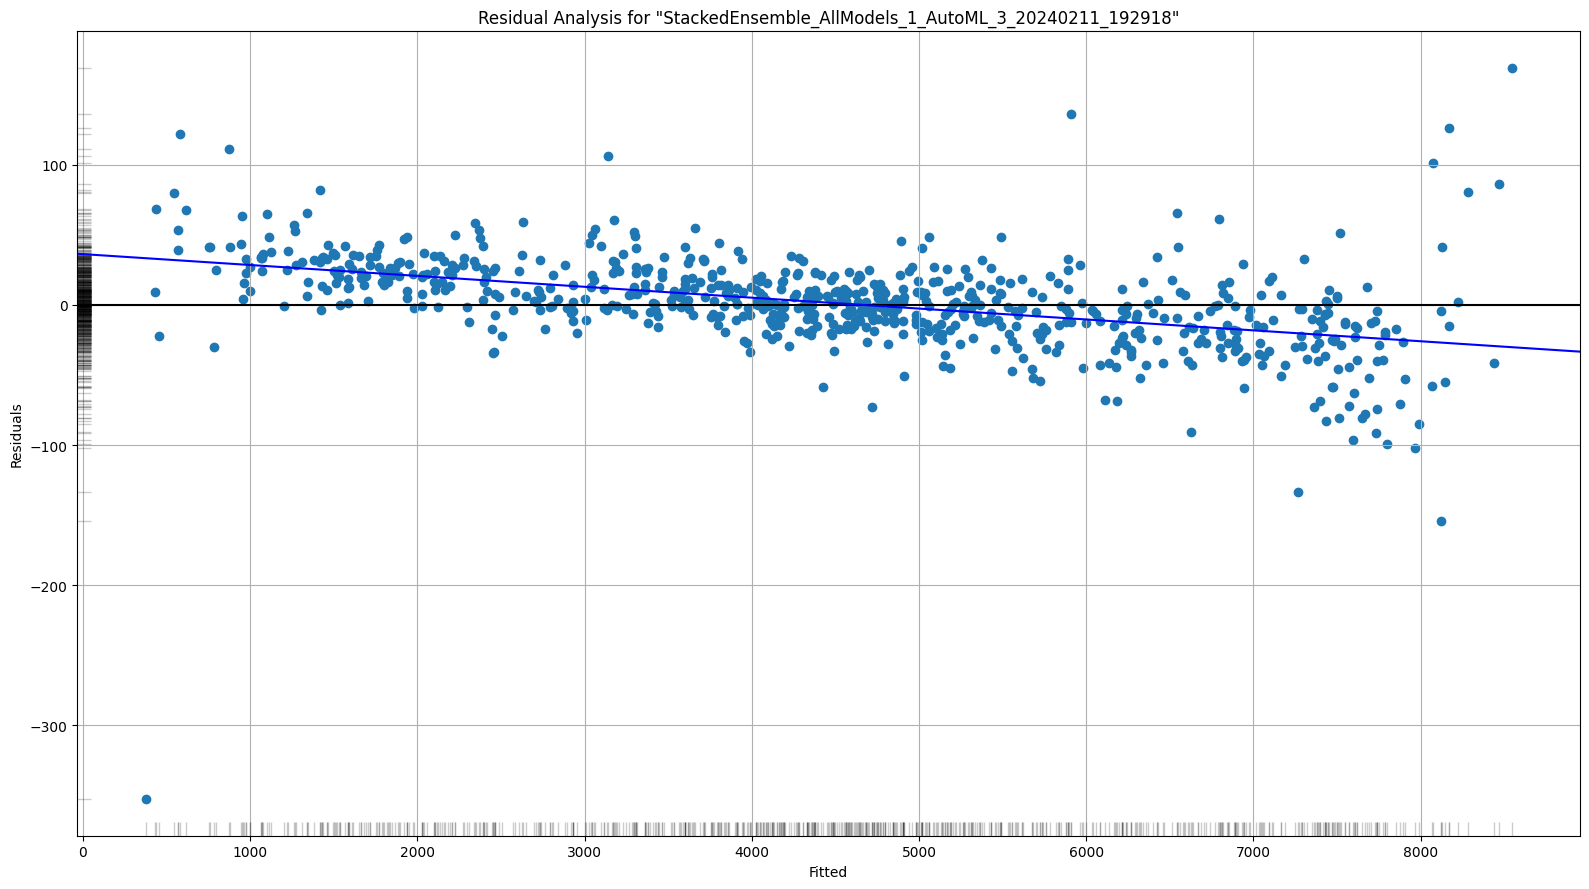

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

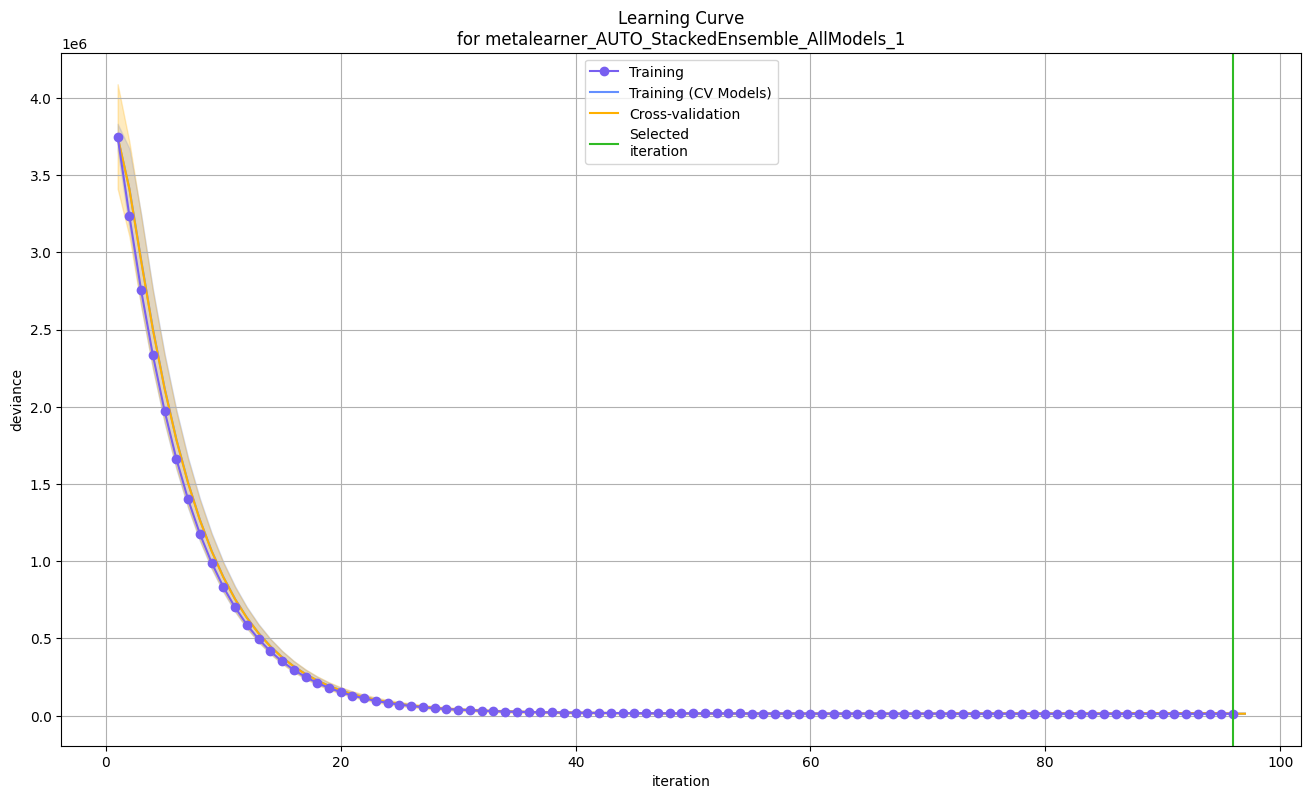

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

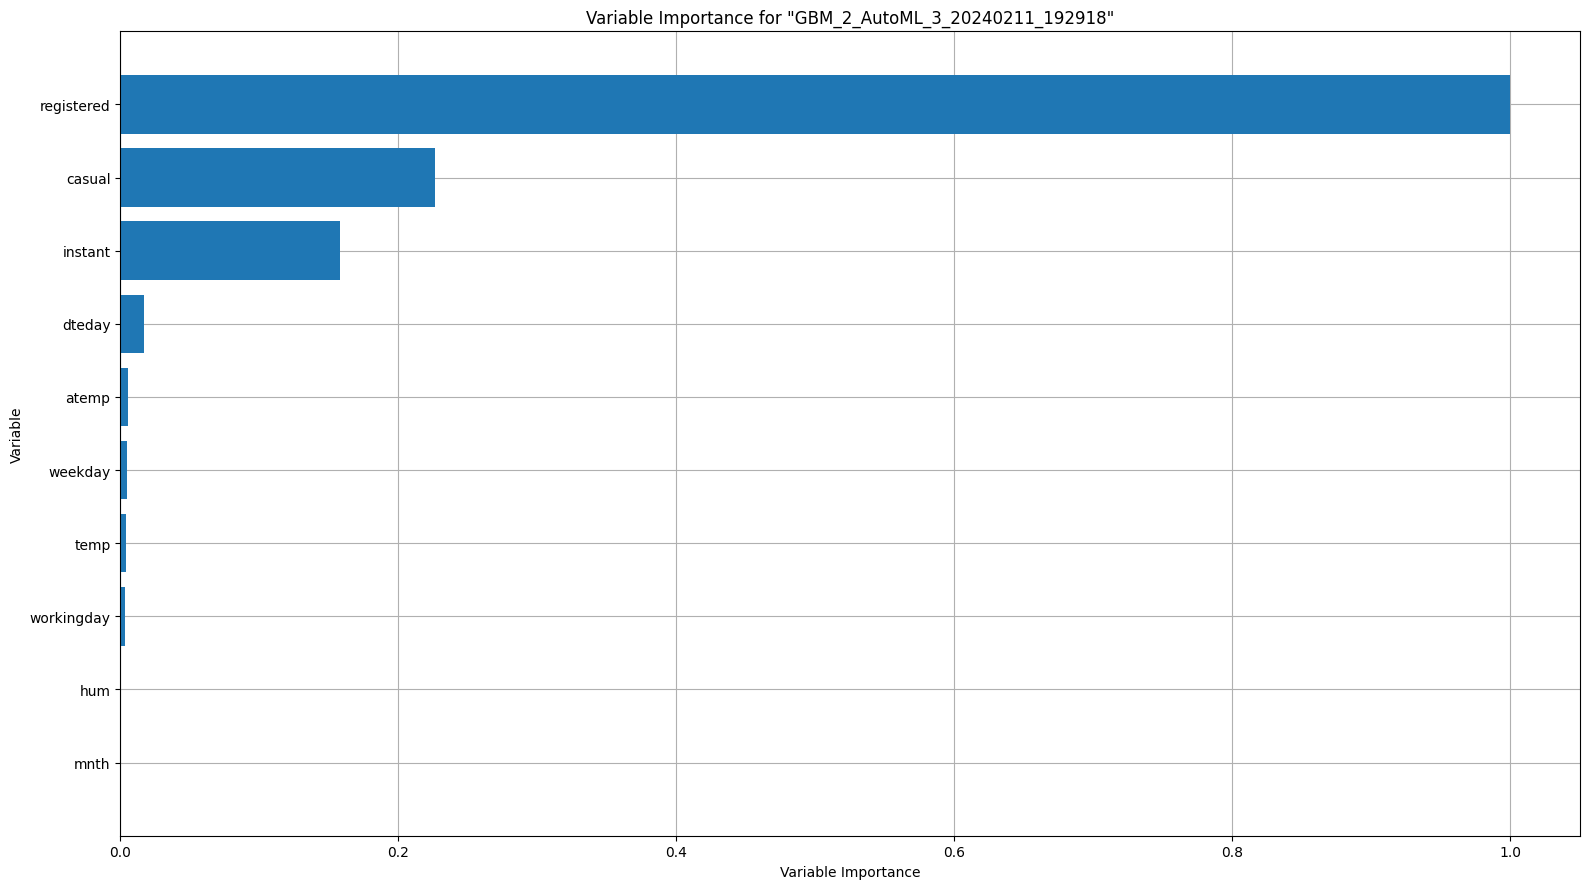

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

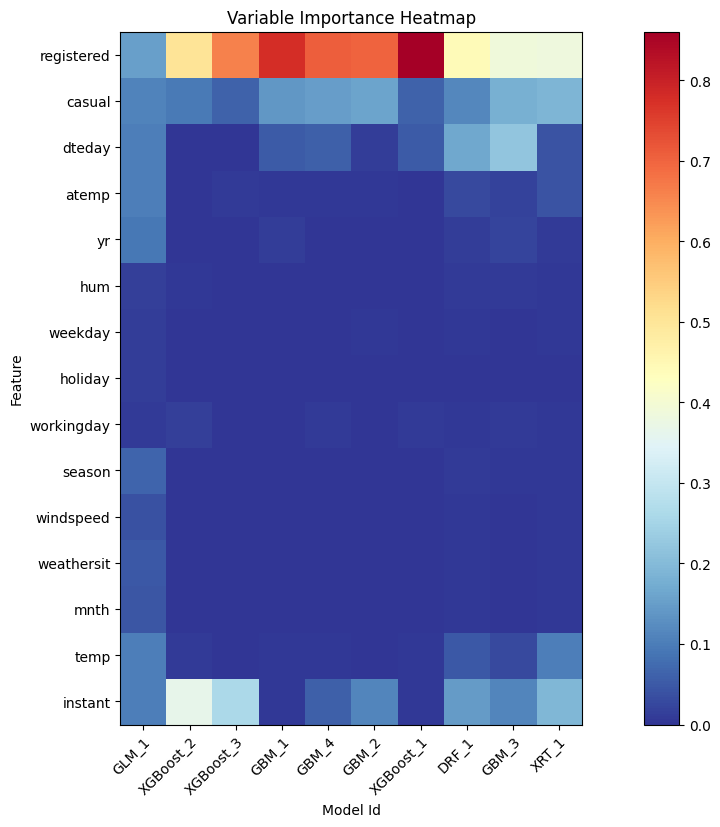

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

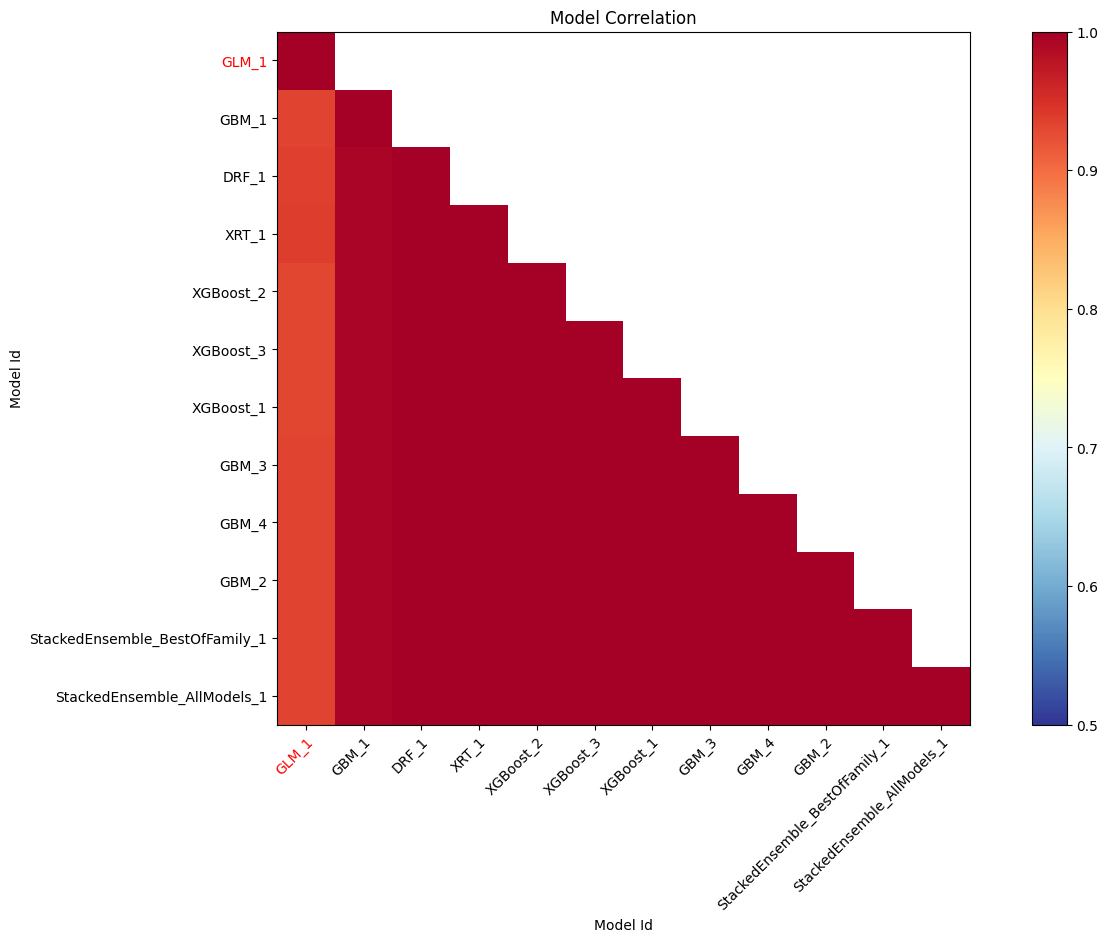

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

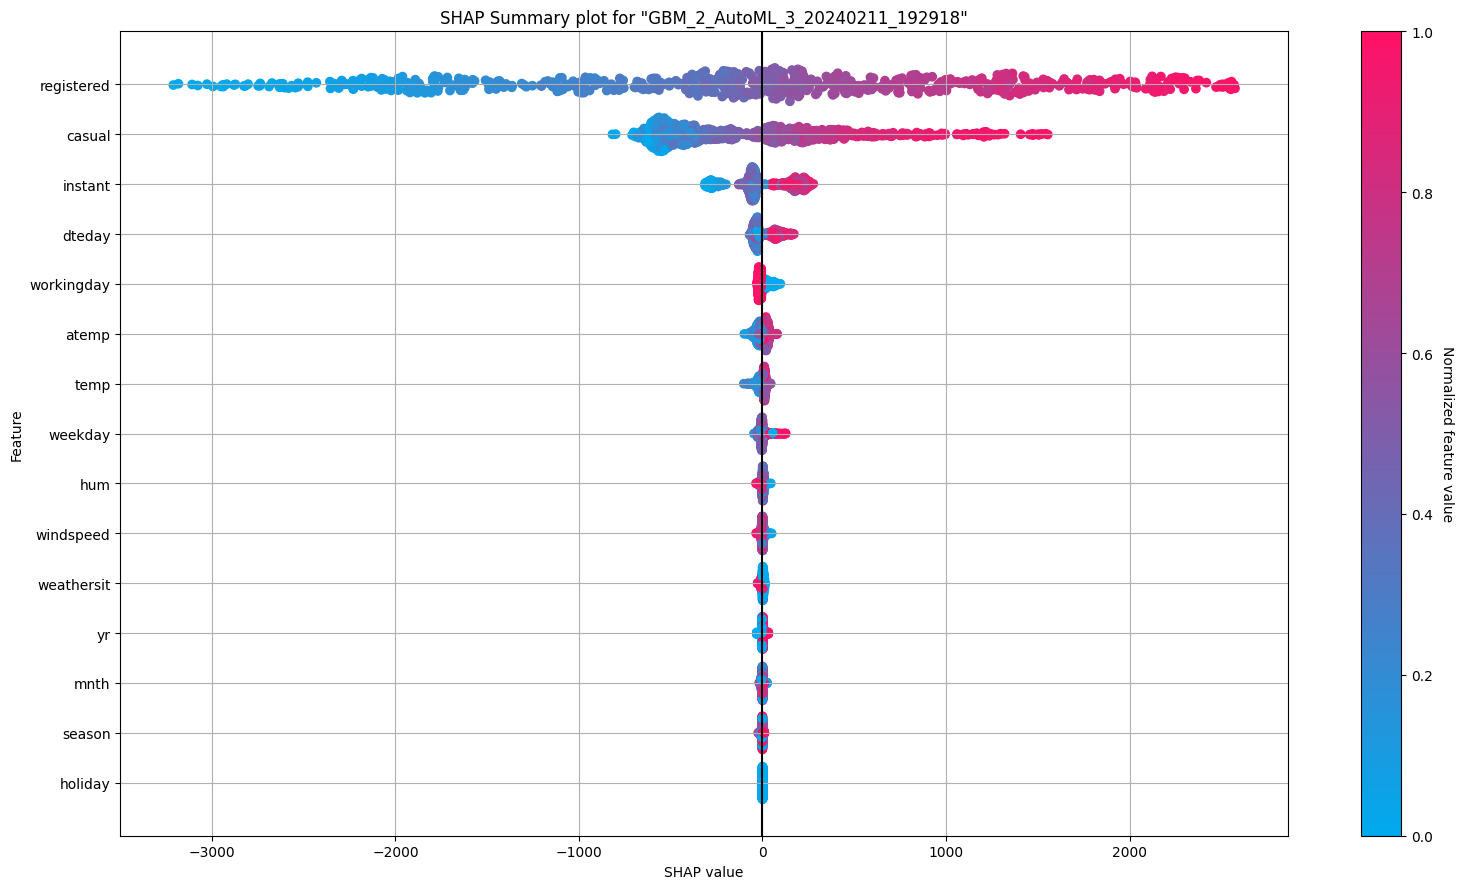

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

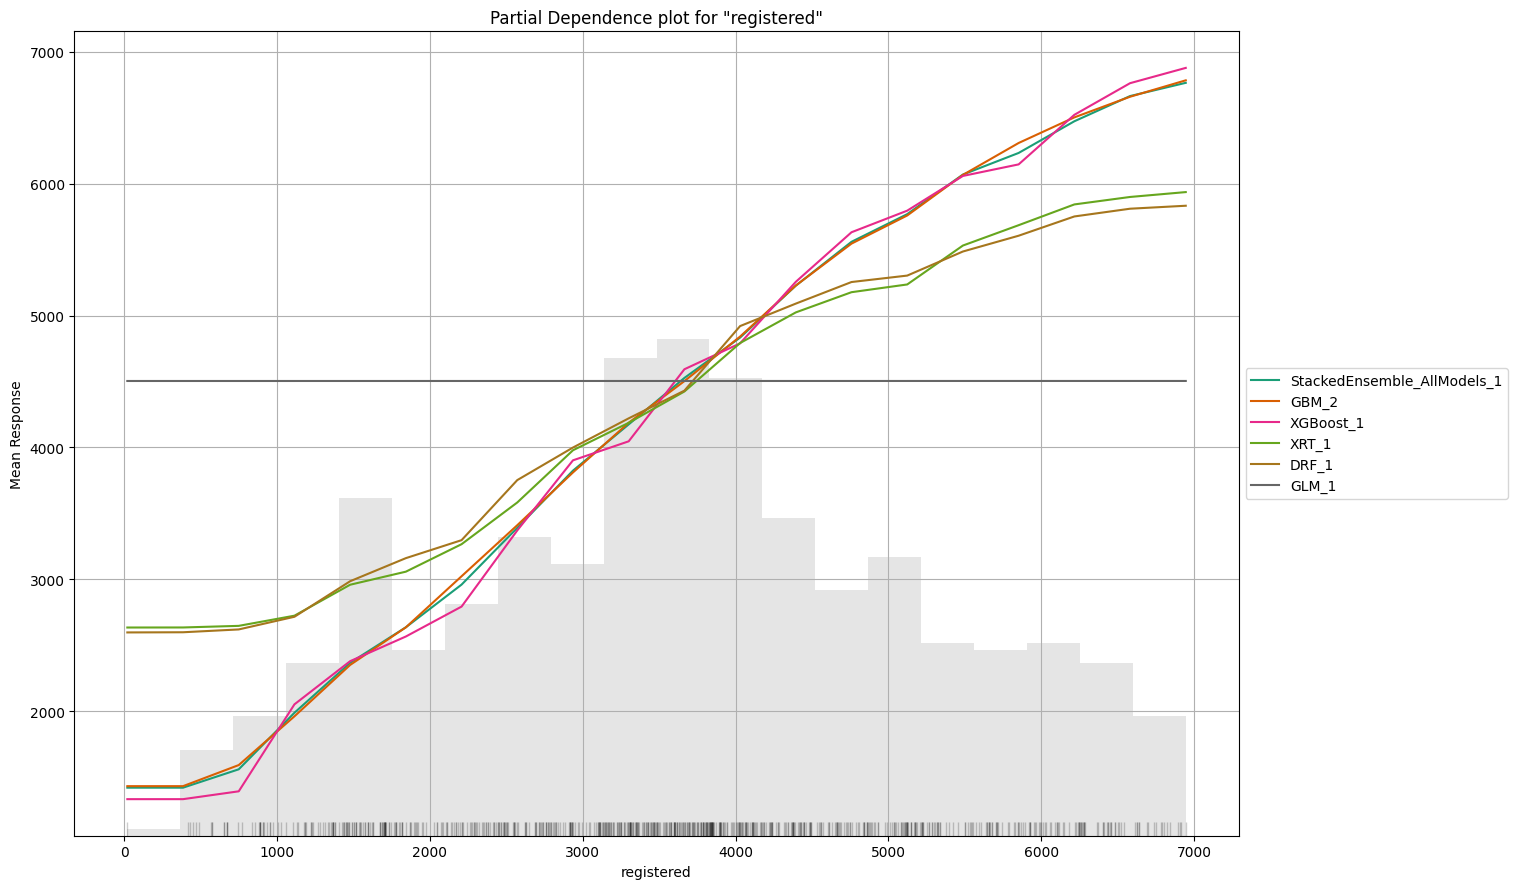

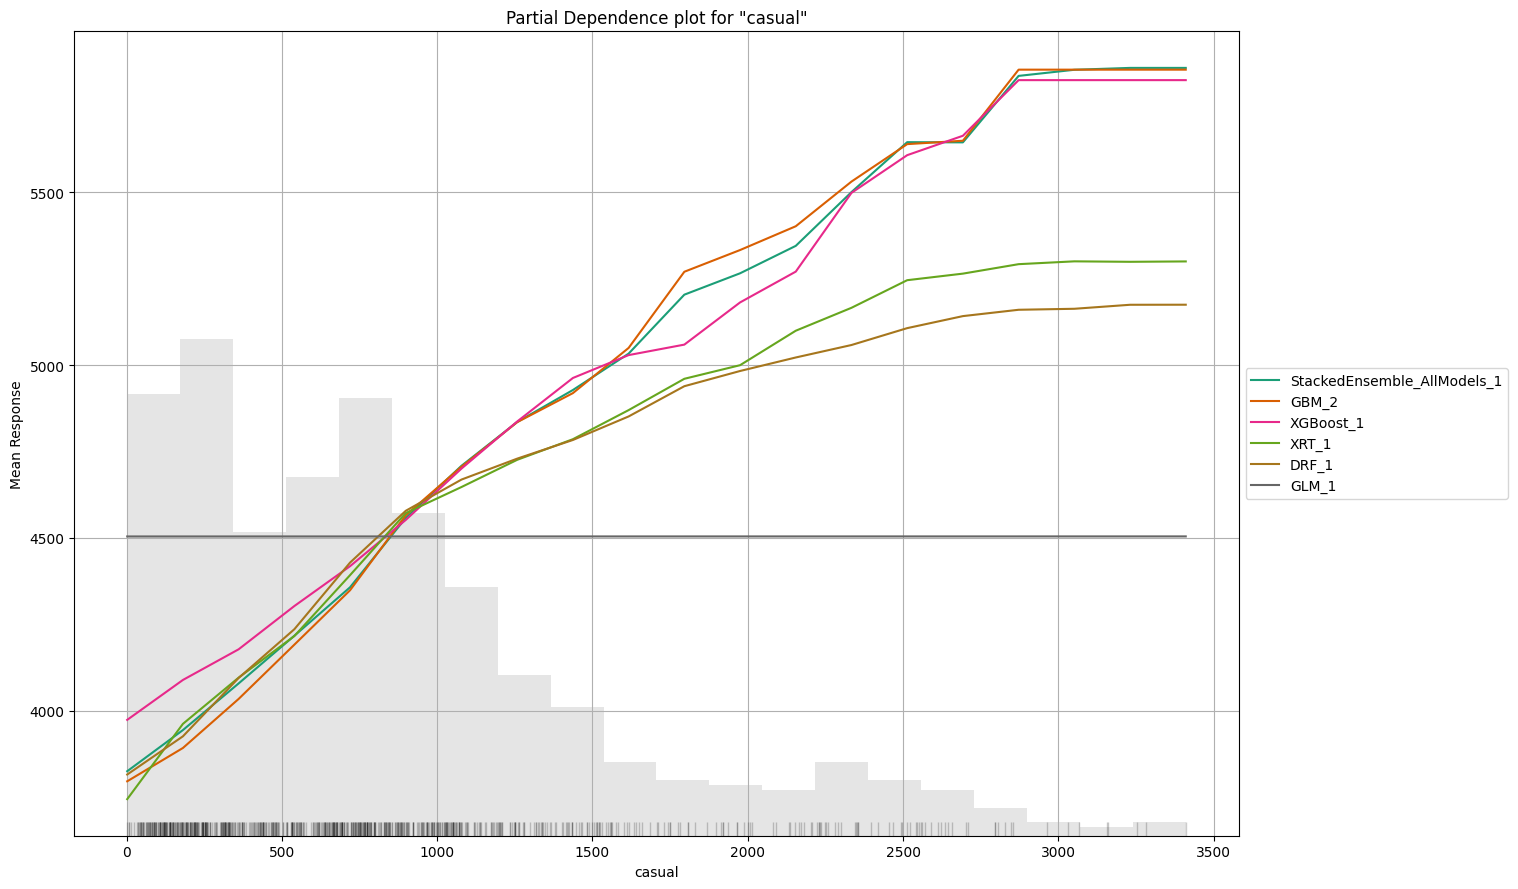

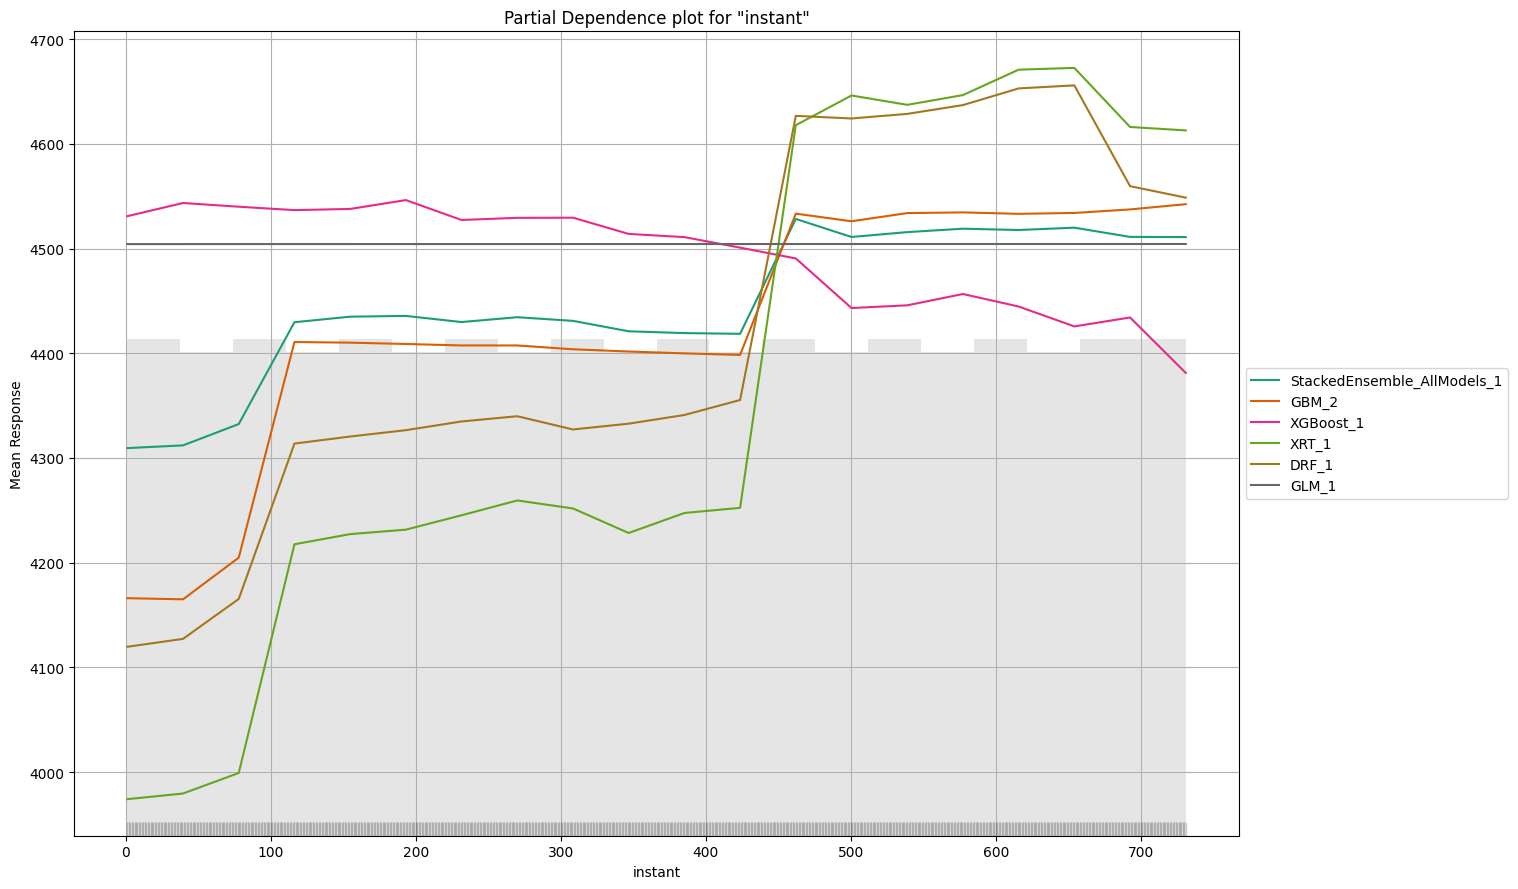

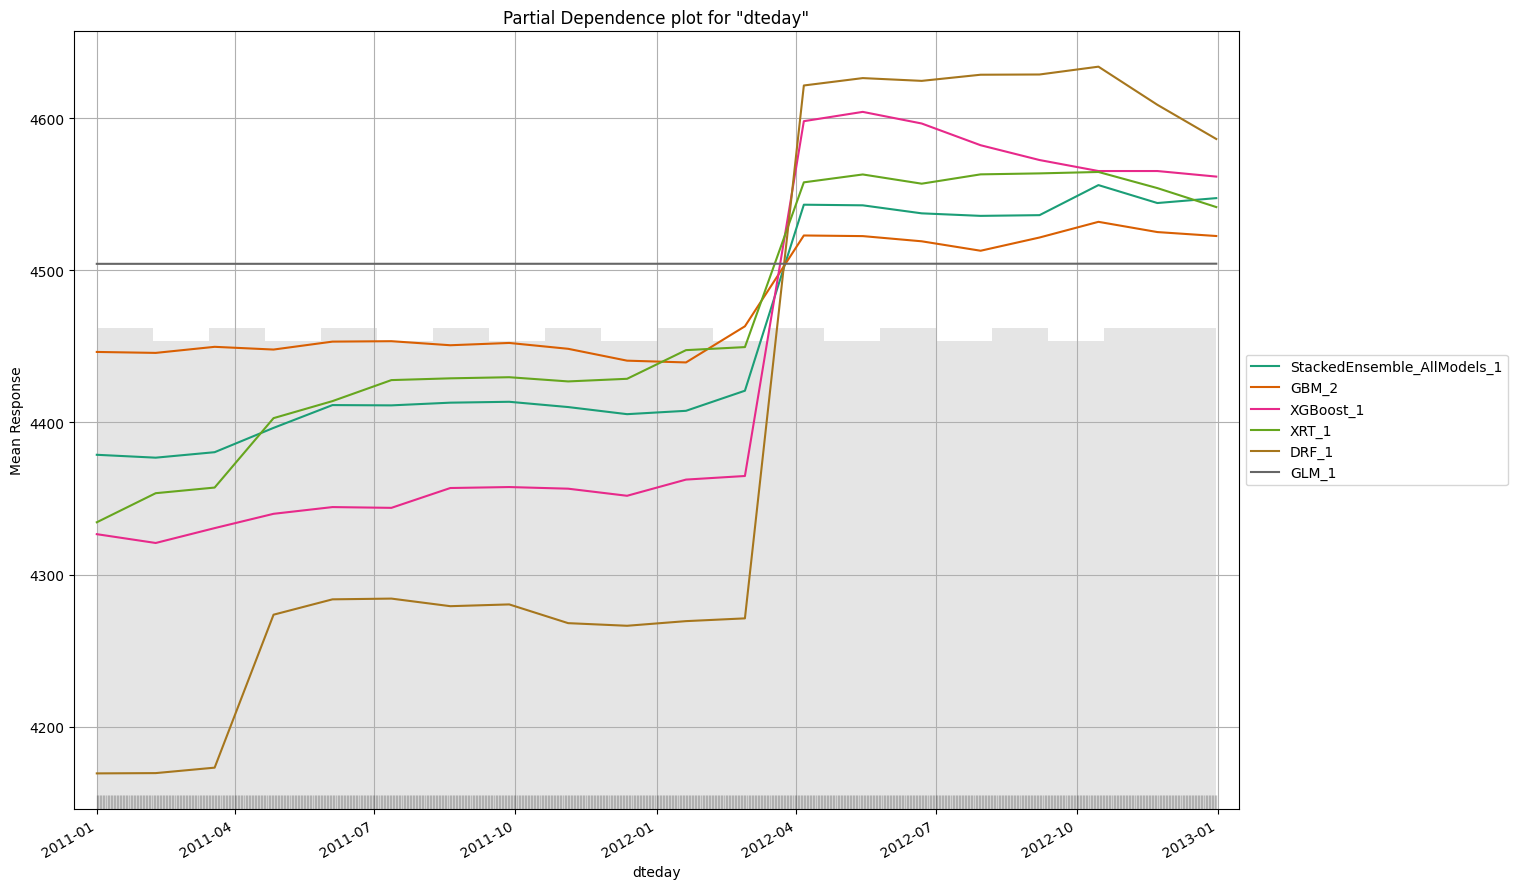

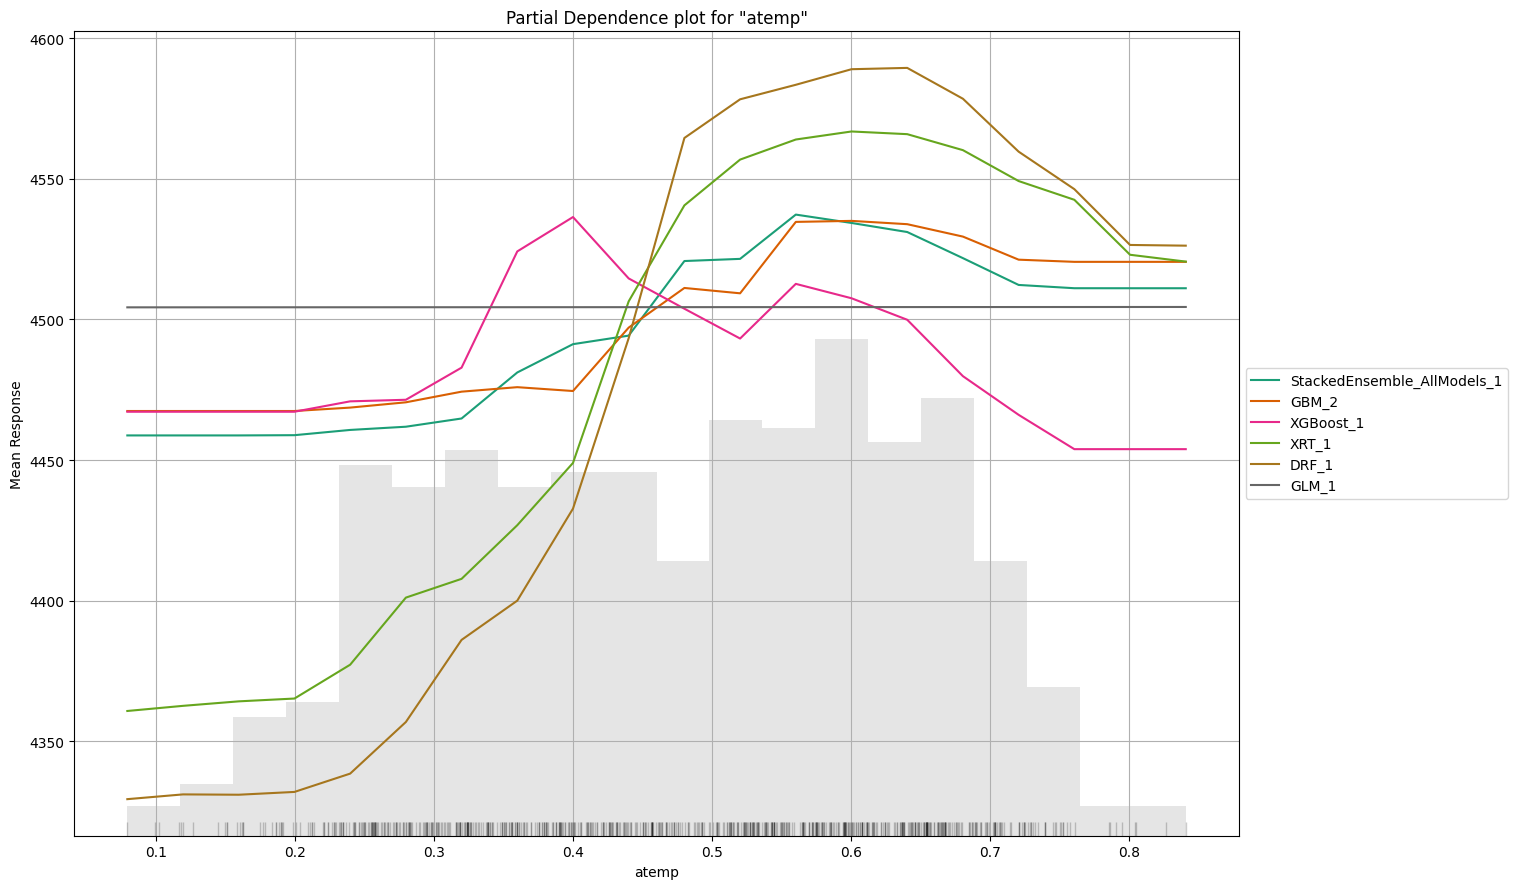

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

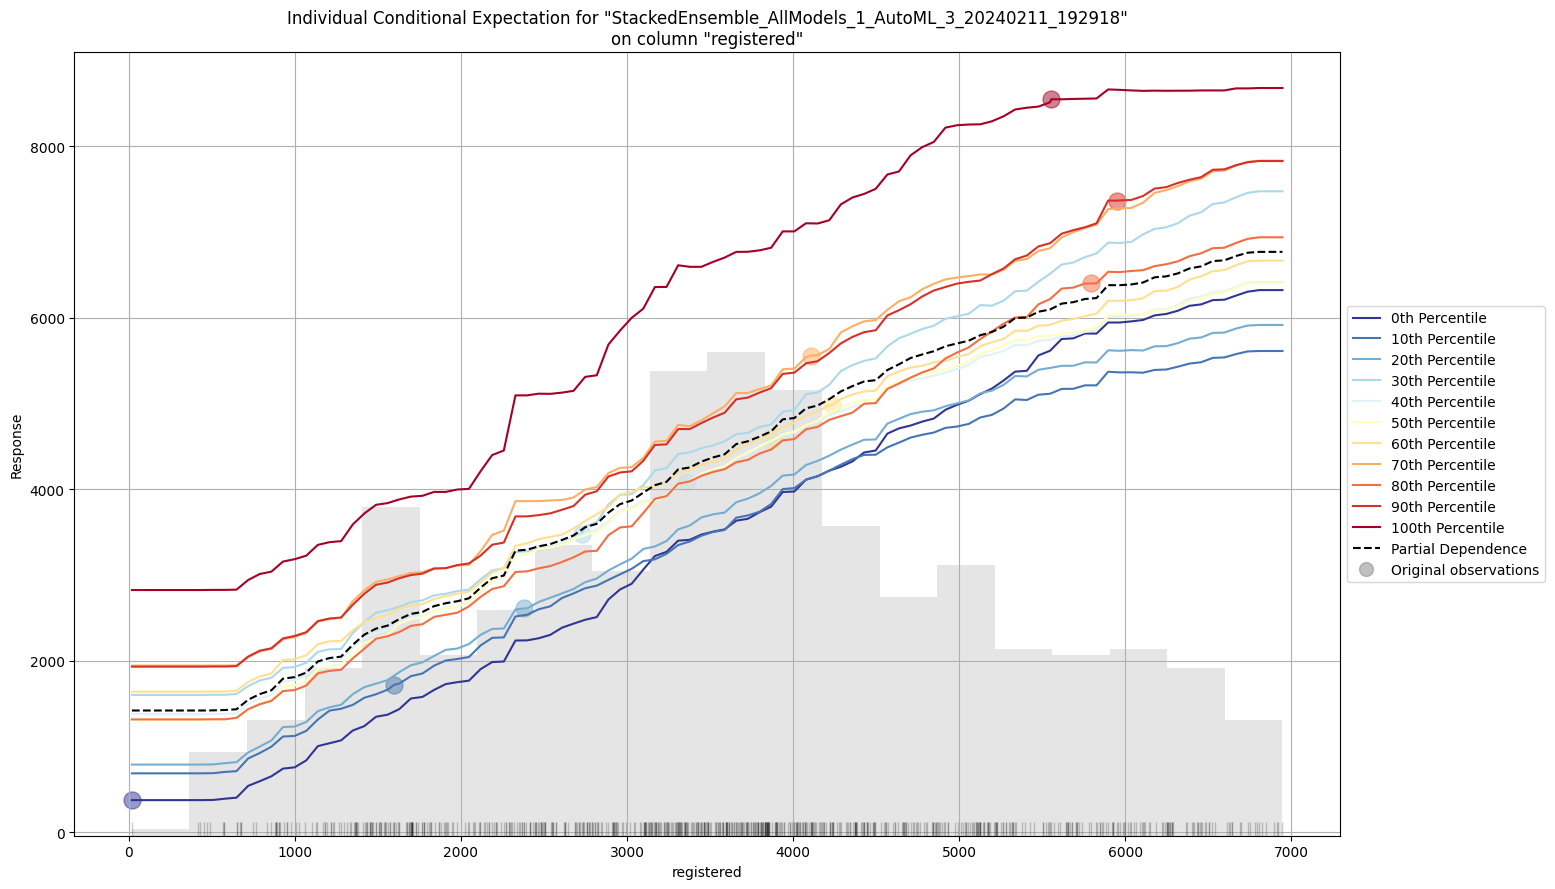

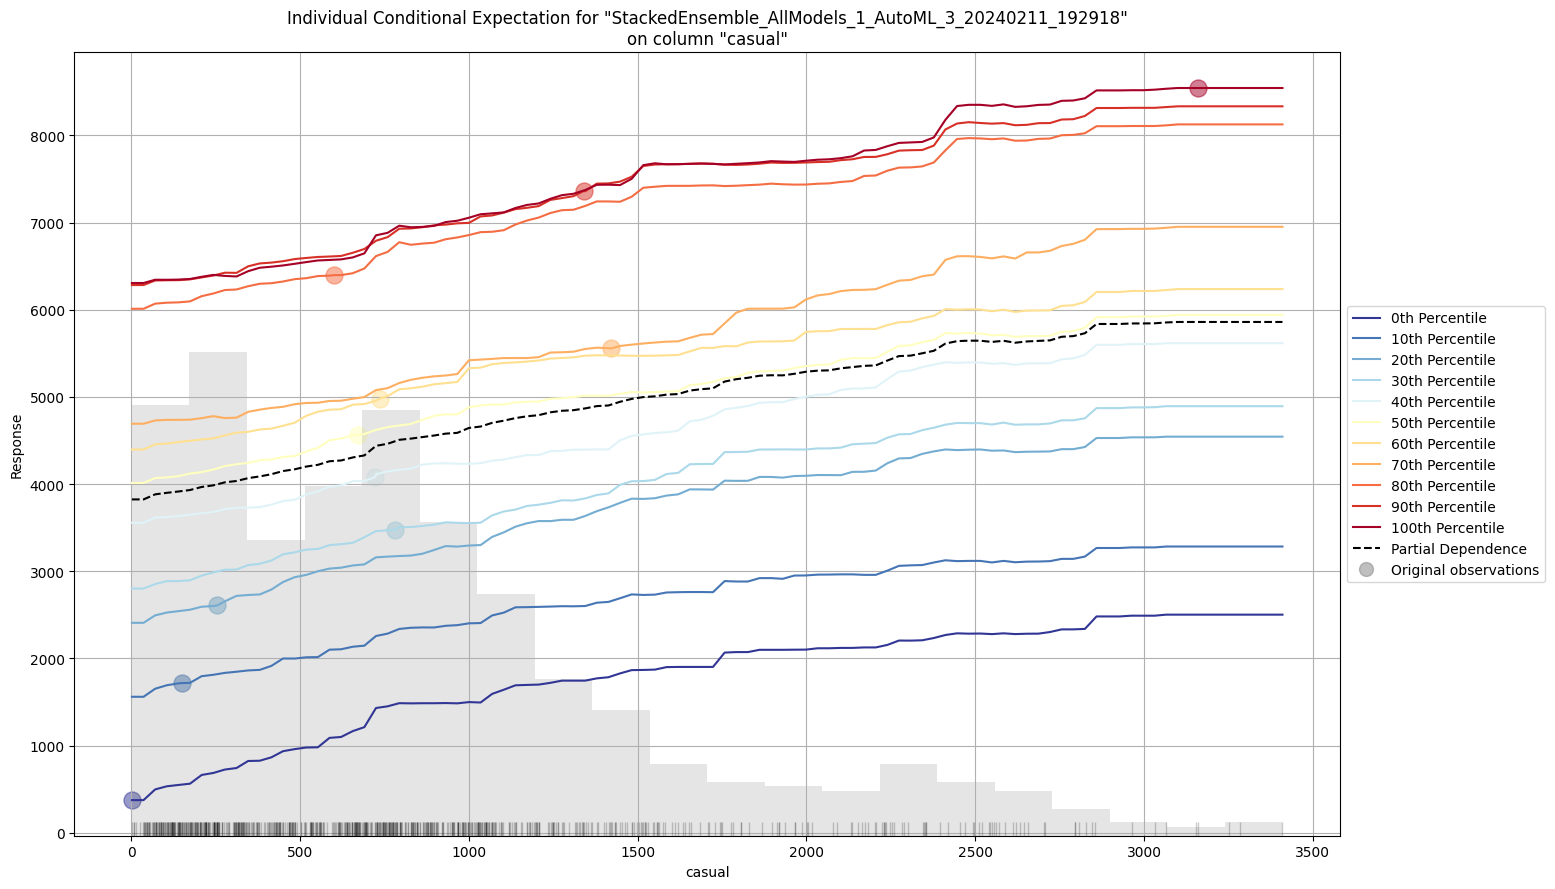

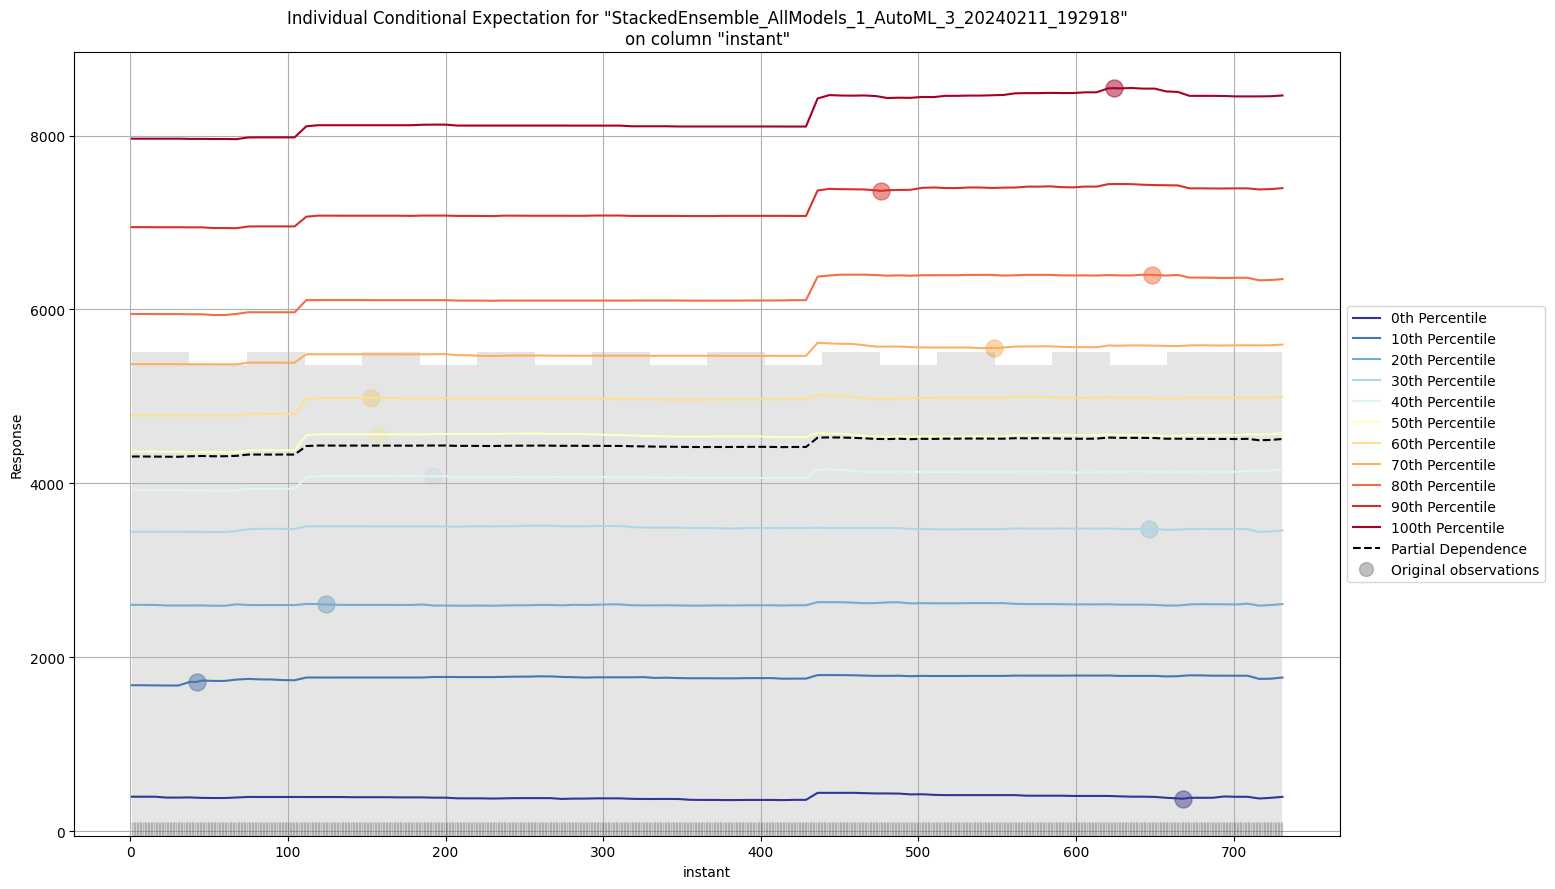

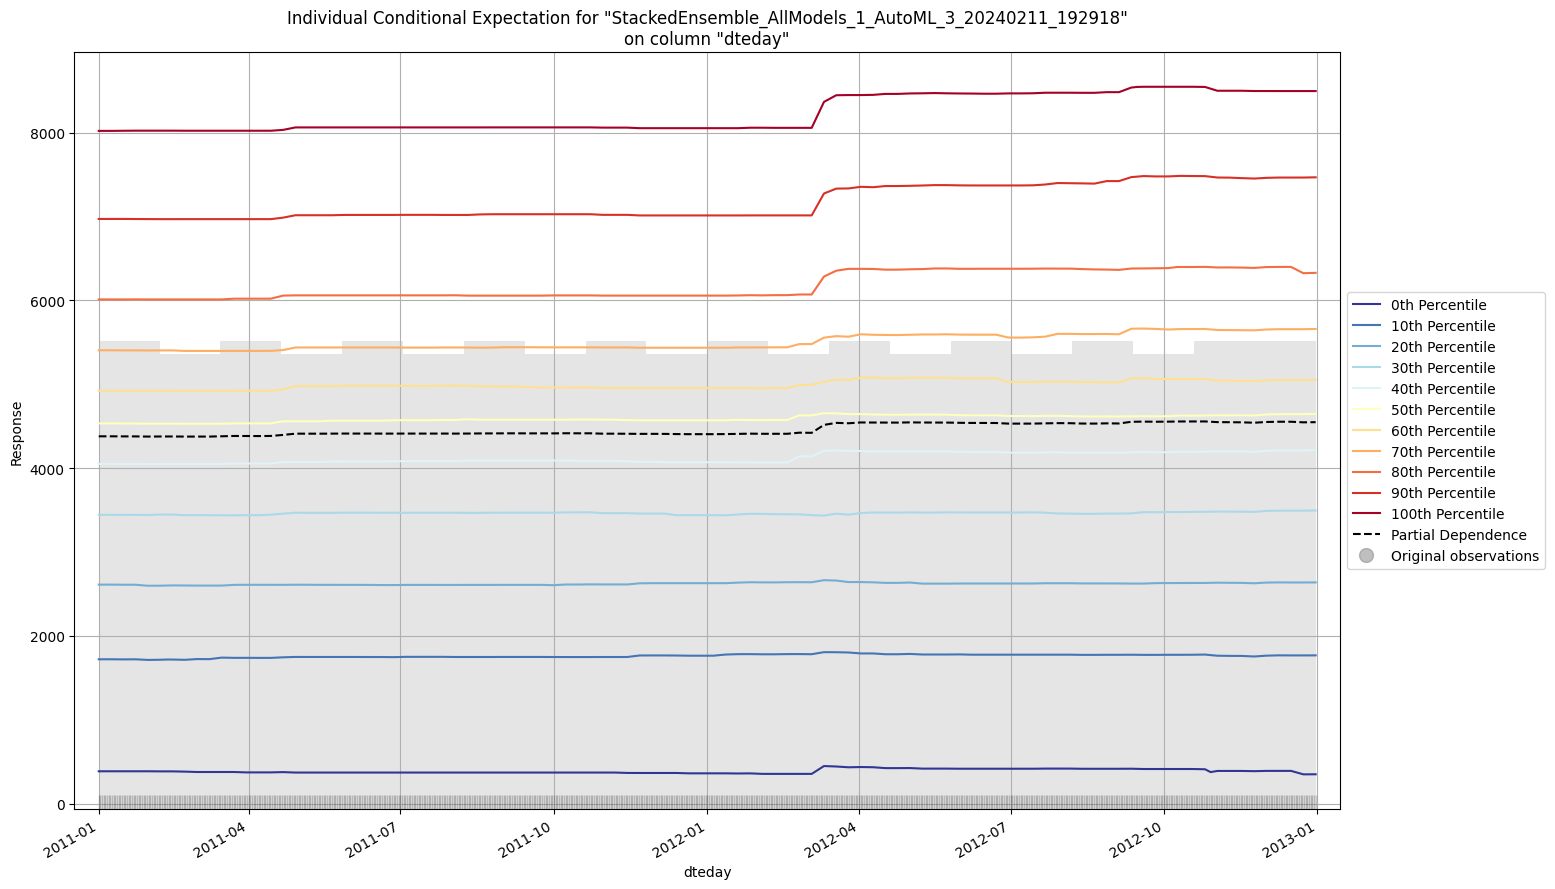

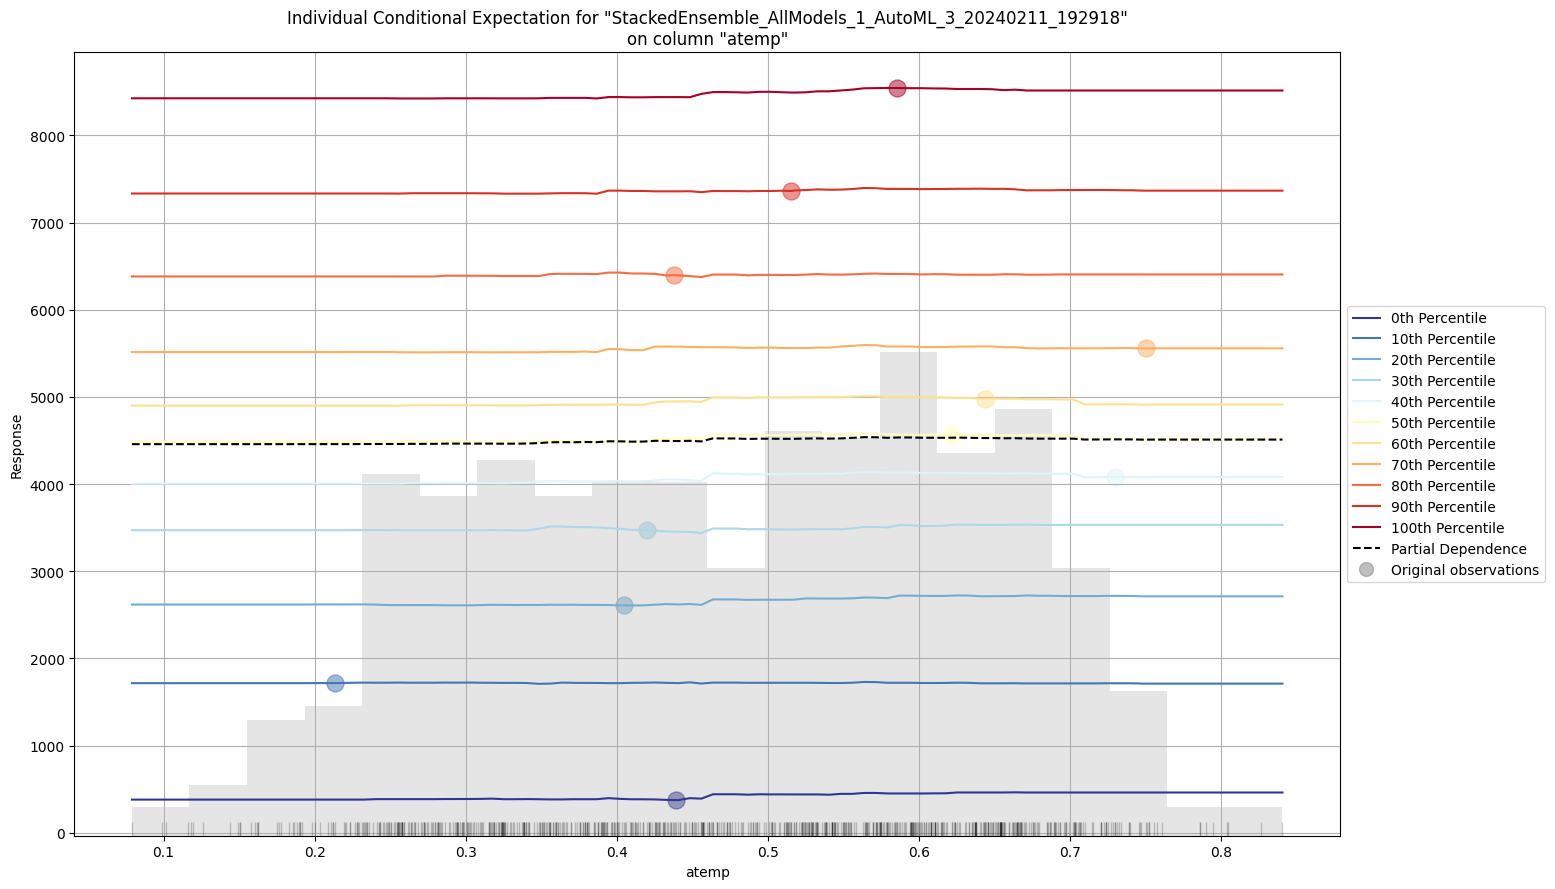

AttributeError: 'H2OExplanation' object has no attribute 'varimp_plot'

In [17]:

h2o_explainer = aml_day.explain(train_day)
h2o_explainer.varimp_plot()
plt.show()
